In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and Preprocess dataset

In [ ]:
# Load the dataset using pandas.read_csv

df = pd.read_csv('adult.csv')

In [ ]:
# Print first rows the dataset

print(df.iloc[0])

age                               25
workclass                    Private
fnlwgt                        226802
education                       11th
educational-num                    7
marital-status         Never-married
occupation         Machine-op-inspct
relationship               Own-child
race                           Black
gender                          Male
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country         United-States
income                         <=50K
Name: 0, dtype: object


In [ ]:
# Drop rows with any missing values

df = df.dropna()

# Visualize dataset
Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.

### Scatter plot for Age vs Hours-per-week

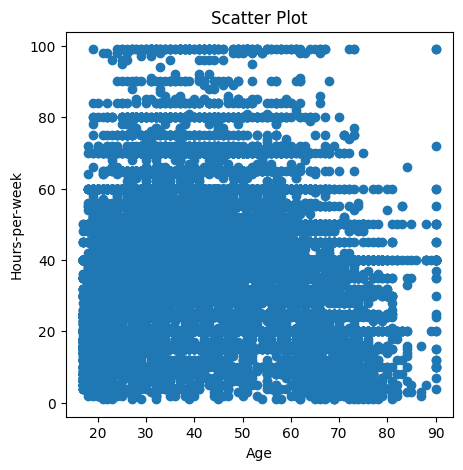

In [ ]:
# Scatter plot for Age vs Hours-per-week

plt.figure(figsize=(5,5))
plt.scatter(x=df['age'], y=df['hours-per-week'], label = "label" )
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Scatter Plot')
plt.show()

### Histogram for distribution of age distribution

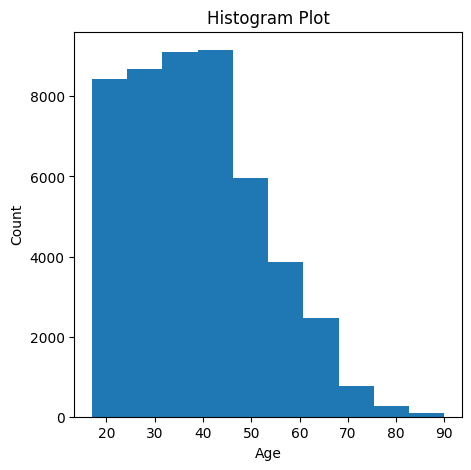

In [ ]:
# Histogram for distribution of age distribution
plt.figure(figsize=(5,5))
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram Plot')
plt.show()


### Box plot for age to see outliers

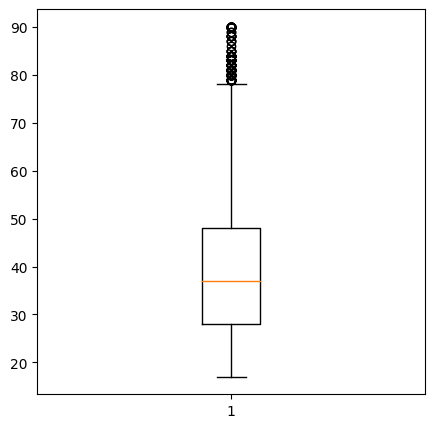

In [ ]:
# Box plot for age to see outliers
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['age'])
plt.show()


### Pair plot for Age, education-num, and hours-per-week

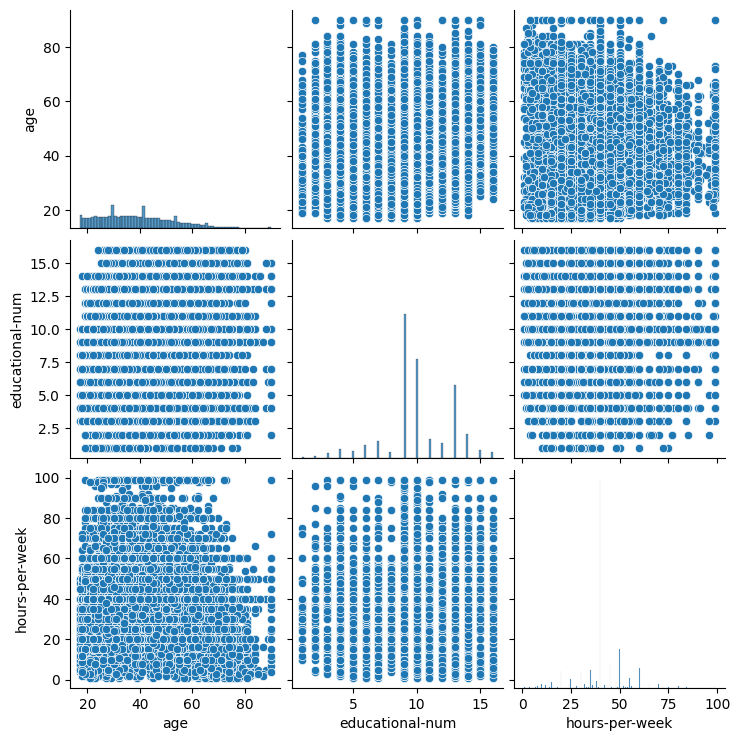

In [ ]:
# Pair plot for Age, education-num, and hours-per-week

g = sns.pairplot(df, vars=["age", "educational-num", "hours-per-week"])
plt.show()


# Encode and Normalize dataset

In [ ]:
# Use one-hot endcoding to convert categorical features into numerical format

# split the dataframe into its numerical and categorical components
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

# create a OneHotEncoder that ignores (0 encodes) unseen categories
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_encoded = encoder.fit_transform(df_cat)

# create the names for the one-hot encoded categorical features
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(df_cat.columns) for cat in encoder.categories_[i]]

# put the features into a dataframe and join with the original
# numerical features
one_hot_features = pd.DataFrame(df_encoded, columns=categorical_columns)
df = df_num.join(one_hot_features)

print(df.iloc[0])

age                                 25.0
fnlwgt                          226802.0
educational-num                      7.0
capital-gain                         0.0
capital-loss                         0.0
                                  ...   
native-country_United-States         1.0
native-country_Vietnam               0.0
native-country_Yugoslavia            0.0
income_<=50K                         1.0
income_>50K                          0.0
Name: 0, Length: 110, dtype: float64


In [ ]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

# create StandardScaler
scaler = StandardScaler()

# fit and transform the data
normalized_data = scaler.fit_transform(df)

# create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

normalized_df.iloc[0]

age                            -0.995129
fnlwgt                          0.351675
educational-num                -1.197259
capital-gain                   -0.144804
capital-loss                   -0.217127
                                  ...   
native-country_United-States    0.338083
native-country_Vietnam         -0.041999
native-country_Yugoslavia      -0.021705
income_<=50K                    0.560845
income_>50K                    -0.560845
Name: 0, Length: 110, dtype: float64

# Implement PCA from Scratch

In [ ]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.


# covariance
cov = normalized_df.cov()

# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Sort the eigenvalues and eigenvevtors accordinaly

# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

# Explained variance is the term that gives us an idea of the amount of the total
# variance which has been retained by selecting the principal components instead of the original feature space.
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Determine the Number of Principal Components
n_components = np.argmax(explained_var >= 0.50) + 1

# Project the Data onto the Selected Principal Components
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(
    u,
	index = normalized_df.columns,
	columns = [f'PC{i}' for i in range(1, n_components+1)]
)

# Dimensionality reduction by Matrix multiplication or dot Product
df_pca = normalized_df @ pca_component
# Rename the columns name
df_pca.rename({f'PC{i}': f'PCA{i}' for i in range(1, n_components+1)}, axis=1, inplace=True)

print(df_pca)


           PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     -2.593728 -2.076982 -0.325216  1.384889 -1.610319 -2.972327  0.152712   
1      1.442151 -2.321097  0.817538 -0.120534  0.710274 -0.023023 -0.854712   
2      3.158278  0.840215  0.402063 -0.626612 -0.682662 -1.264566 -0.730526   
3      2.057592 -0.751025 -1.341408  0.374105  0.304562 -3.239963  1.177890   
4     -3.290837  0.738239  1.399396 -4.093597 -4.485435  0.326857  1.564658   
...         ...       ...       ...       ...       ...       ...       ...   
48837 -0.623802  1.692756  0.169696  0.166329  0.951242 -0.033979  3.315095   
48838  2.517287 -1.502550  0.349231  0.344777  0.919537 -0.656383  1.371260   
48839 -2.282271  1.003203 -0.159484 -1.676449  3.822460  0.050533  0.612681   
48840 -2.180187 -0.938659  1.572422  1.239012 -1.258641 -0.596744  0.705311   
48841  2.078416  2.147861 -0.407531 -1.709619  1.601749  0.189247  3.390007   

           PCA8      PCA9     PCA10  ...     PCA29 

# Visualize the PCA-reduced data

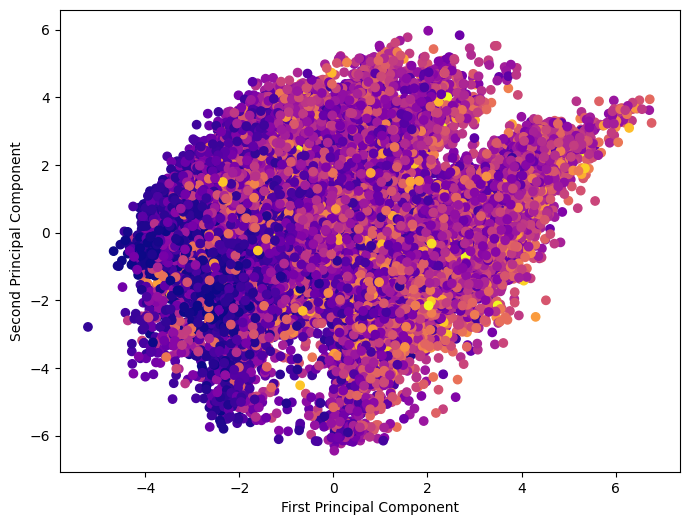

In [ ]:
# Scatter Plot for 2D PCA Data (choose 2 pricipal components)

plt.figure(figsize=(8, 6))

plt.scatter(
    df_pca['PCA1'], df_pca['PCA2'],
    c=normalized_df['age'],
    cmap='plasma'
)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


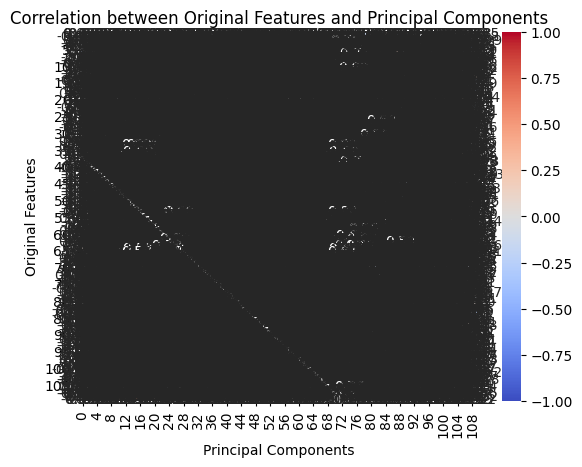

In [ ]:
# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.

correlation_matrix = np.corrcoef(normalized_df.T, df_pca.T)[:normalized_df.shape[1], df_pca.shape[1]:]

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()